In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
X = data[['TV','Radio','Newspaper']]
Y = data['Sales']

In [4]:
X.shape

(200, 3)

In [5]:
Y.shape

(200,)

# Normalize Features

In [6]:
X = (X - X.mean()) / X.std()

In [7]:
X

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593
...,...,...,...
195,-1.267759,-1.317724,-0.769287
196,-0.615491,-1.236899,-1.031011
197,0.348934,-0.940539,-1.109069
198,1.590574,1.261955,1.636743


# Add 1s Column to perform vectorized gradient descent

In [8]:
X = np.c_[np.ones(X.shape[0]),X]

In [9]:
thetas = np.zeros(X.shape[1])

In [10]:
thetas

array([0., 0., 0., 0.])

In [11]:
X.shape

(200, 4)

# Define Gradient Descent Function

In [12]:
def gradient_descent(X,Y,thetas,lr=0.01,iterations=50):
    
    m = len(Y)
    log,mse = [],[]
    for i in range(iterations) :
        
        predictions = np.dot(X,thetas.T)
        error = predictions - Y
        thetas = thetas - (lr * (1 /m) * np.dot(X.T,error))
        mse.append(mean_squared_error(Y,predictions))
        log.append(thetas)
    
    return thetas,log,mse

In [13]:
iterations = 2000
thetas,log,mse = gradient_descent(X,Y,thetas,0.01,iterations)

In [14]:
thetas

array([14.02249997,  3.92908866,  2.79906562, -0.0225916 ])

In [15]:
log

[array([0.140225  , 0.04060816, 0.02991384, 0.01185185]),
 array([0.27904775, 0.08078927, 0.05946614, 0.02345748]),
 array([0.41648227, 0.12054793, 0.08866158, 0.03482087]),
 array([0.55254245, 0.15988865, 0.11750482, 0.04594592]),
 array([0.68724203, 0.19881594, 0.14600041, 0.05683647]),
 array([0.82059461, 0.23733423, 0.17415287, 0.06749632]),
 array([0.95261366, 0.27544789, 0.20196665, 0.07792921]),
 array([1.08331252, 0.31316128, 0.22944614, 0.08813881]),
 array([1.2127044 , 0.35047867, 0.25659567, 0.09812875]),
 array([1.34080235, 0.38740433, 0.28341951, 0.10790259]),
 array([1.46761933, 0.42394243, 0.30992188, 0.11746387]),
 array([1.59316814, 0.46009714, 0.33610694, 0.12681604]),
 array([1.71746145, 0.49587256, 0.36197879, 0.13596251]),
 array([1.84051184, 0.53127275, 0.38754148, 0.14490666]),
 array([1.96233172, 0.56630172, 0.412799  , 0.1536518 ]),
 array([2.0829334 , 0.60096345, 0.4377553 , 0.16220119]),
 array([2.20232907, 0.63526187, 0.46241425, 0.17055804]),
 array([2.3205

In [16]:
mse

[223.71625,
 219.26954506345152,
 214.91298867348203,
 210.6447378255459,
 206.4629875771594,
 202.3659702520762,
 198.3519546613528,
 194.41924534093815,
 190.56618180543177,
 186.79113781766034,
 183.09252067373248,
 179.46877050323698,
 175.91835958425952,
 172.4397916728969,
 169.03160134695835,
 165.69235336354737,
 162.42064203022565,
 159.21509058946768,
 156.0743506161197,
 152.99710142758354,
 149.98204950645268,
 147.0279279353326,
 144.13349584358429,
 141.29753786573502,
 138.51886361130644,
 135.79630714581515,
 133.1287264827062,
 130.5150030859863,
 127.9540413833264,
 125.44476828941079,
 122.98613273931299,
 120.57710523168454,
 118.21667738154618,
 115.9038614824775,
 113.6376900780034,
 111.41721554198142,
 109.24150966779834,
 107.10966326618745,
 105.02078577148326,
 102.97400485613372,
 100.96846605329411,
 99.0033323873305,
 97.07778401206447,
 95.19101785659436,
 93.34224727853208,
 91.53070172449772,
 89.75562639771775,
 88.01628193257602,
 86.31194407596989,
 

# Plot the cost function vs number of iterations to see how GD works

In [17]:
def plotGradientDescentGraph(iterations,mse):
    fig,ax = plt.subplots()
    ax.plot(np.arange(iterations),mse,'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    plt.show()

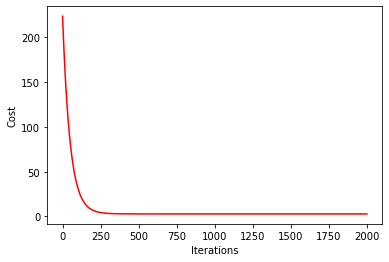

In [18]:
plotGradientDescentGraph(iterations,mse)